In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df1 = pd.read_csv("Fluxes_H_LE_CO2/BoG/FBG_fluxes_30min_20230101_20230801.csv")
df2 = pd.read_csv("Fluxes_H_LE_CO2/BoG/FBG_fluxes_30min_20230401_20230801.csv")

df1 = df1.drop(0)
# convert timestamp columns
df1["DATE_START"] = pd.to_datetime(df1["TIMESTAMP_START"].str.split(" ").str[0])
df1["TIME_START"] = df1["TIMESTAMP_START"].str.split(" ").str[1]
df1["DATE_MID"] = pd.to_datetime(df1["TIMESTAMP_MITTE"].str.split(" ").str[0])
df1["TIME_MID"] = df1["TIMESTAMP_MITTE"].str.split(" ").str[1]
df1["DATE_END"] = pd.to_datetime(df1["TIMESTAMP_ENDE"].str.split(" ").str[0])
df1["TIME_END"] = df1["TIMESTAMP_ENDE"].str.split(" ").str[1]
df1 = df1.drop(["TIMESTAMP_START", "TIMESTAMP_MITTE", "TIMESTAMP_ENDE"], axis=1)
df1["H_f"] = df1["H_f"].astype(float)
df1["LE_f"] = df1["LE_f"].astype(float)
df1["NEE_f"] = df1["NEE_f"].astype(float)

<Axes: xlabel='TIME_START'>

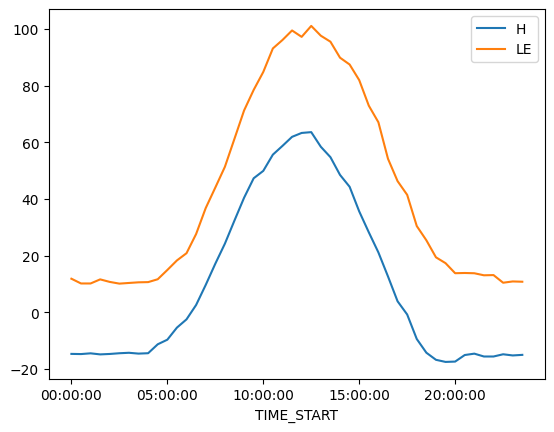

In [64]:
# average over all days
df = df1.groupby("TIME_START").agg(H=("H_f", "mean"), LE=("LE_f", "mean"))
df.plot()